In [3]:
import pybroker as pyb
from datetime import datetime
from pybroker import ExecContext, Strategy, YFinance, StrategyConfig, portfolio, context
import talib
from datetime import datetime , timedelta
import pandas as pd
import numpy as np

pyb.enable_data_source_cache('rebalancing')
#p = portfolio.Portfolio(10000)
config = StrategyConfig(initial_cash=10000)






In [4]:
rsi_40 = pyb.indicator('rsi_40', lambda data: talib.RSI(data.close, timeperiod=30))


securities =  ['AMAT', 'ASML', 'DMLP', 'EXPD', 'EXPI', 'INMD', 'LSTR', 'LULU', 'META', 'MSB', 'MSFT', 'RVLV', 'SIMO', 'SMLR', 'STKS', 'TER', 'VALE', 'ULTA']

start_date = "01/01/20"
end_date = "01/01/23"
yf = YFinance()
start_date_temp = datetime.strptime(start_date, "%m/%d/%y")

# Convert start date string to datetime object

# Add 60 days

vixm_start_date = start_date_temp - timedelta(days=81)
rsis = {}
for s in securities:
    data = yf.query(s, vixm_start_date, end_date)

    rsis[s] = rsi_40(data)







    



Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.



In [126]:
rsis["LSTR"].loc[start_0]

52.97059665024384

In [6]:
set_inital_allocs = {'AMAT' : 0.0,
 'ASML': 0.0,
 'DMLP' : 0.0,
 'EXPD' :0.0,
 'EXPI':0.0, 
 'INMD':0.0, 
 'LSTR':0.0, 
 'LULU':0.0, 
 'META':0.0, 
 'MSB':0.0,
 'MSFT':0.0,
 'RVLV':0.0,
 'SIMO':0.0,
 'SMLR':0.0,
 'STKS':0.0, 
 'TER':0.0,
 'VALE':0.0,
 'ULTA':0.0}


start_0 = start_date_temp - timedelta(days=1)
# Convert end date to string format

start_0 = start_0.strftime("%Y-%m-%d")
print(start_0)
rsi_0 = {}
for k,m in rsis.items():
    df = rsis[k]
    #print(df)
    print(k)

    rs = df.loc[start_0]
    rsi_0[k] = rs

rsi_0 = dict(sorted(rsi_0.items(), key=lambda x: x[1]))

to_buy = list(rsi_0.keys())[:7]

for t in to_buy:
    set_inital_allocs[t]+=0.142857143



2019-12-31
AMAT
ASML
DMLP
EXPD
EXPI
INMD
LSTR
LULU
META
MSB
MSFT
RVLV
SIMO
SMLR
STKS
TER
VALE
ULTA


In [129]:
rsi_0

{'RVLV': 45.41637281767778,
 'MSB': 52.27848603319367,
 'INMD': 52.65364519604111,
 'ULTA': 52.80239872614428,
 'LSTR': 52.97059665024384,
 'EXPD': 59.61866121312953,
 'TER': 59.86515450313819,
 'AMAT': 60.19165667818841,
 'META': 60.315472700165884,
 'VALE': 60.51555510116617,
 'EXPI': 61.08576268924344,
 'DMLP': 61.39897672905853,
 'LULU': 61.841387851951765,
 'ASML': 63.5350775045902,
 'SMLR': 63.816678985412665,
 'STKS': 65.51424673613063,
 'SIMO': 68.24555571622828,
 'MSFT': 68.27794337293493}

In [7]:
set_inital_allocs

{'AMAT': 0.0,
 'ASML': 0.0,
 'DMLP': 0.0,
 'EXPD': 0.142857143,
 'EXPI': 0.0,
 'INMD': 0.142857143,
 'LSTR': 0.142857143,
 'LULU': 0.0,
 'META': 0.0,
 'MSB': 0.142857143,
 'MSFT': 0.0,
 'RVLV': 0.142857143,
 'SIMO': 0.0,
 'SMLR': 0.0,
 'STKS': 0.0,
 'TER': 0.142857143,
 'VALE': 0.0,
 'ULTA': 0.142857143}

In [17]:
trigs = []

cur2=[]
dates=[]
trade_exec = {}

    #print(((ctxs["TSLA"]._curr_date)))
def shell(ctxs:dict[str, ExecContext]):
    #print(ctxs)
    pass 
    

def buy_low(ctxs: dict[str, ExecContext]):
    # If shares were already purchased and are currently being held, then return.
    triggered = False 

    

    #for c in list(ctxs.keys()):
      #  pos = ctxs[c].long_pos()
       # if pos:
       #  cur_port_val += float(ctxs[c].open*float(pos.shares))

   # print(type(cur_port_val))

    dt = tuple(ctxs.values())[0].dt
    date_object = datetime.strptime(str(dt), "%Y-%m-%d %H:%M:%S")

# Convert datetime object to the desired format
    dt2 = date_object.strftime("%Y-%m-%d")
    st0 = start_date_temp.strftime("%Y-%m-%d")
    st0 = str(st0)
    print(dt2)
    #print(dt2)

    expected_alloc = {}


    for s in securities:
     expected_alloc[s] = 0.0

    rsi_1 = {}
    for k,m in rsis.items():
      df = rsis[k]
    #print(df)
      #print(k)

      rs_ = df.loc[dt2]
      rsi_1[k] = rs_

    rsi_1 = dict(sorted(rsi_1.items(), key=lambda x: x[1]))

    to_buy = list(rsi_1.keys())[:7]

    for t in to_buy:
      expected_alloc[t]+=0.142857143
      
    print(expected_alloc)
    if dt2 == "2020-01-02":
       print("DT2 " ,dt2)

       cur_alloc = set_inital_allocs

       for c in cur_alloc.keys():
          init_buy = ctxs[c].calc_target_shares(cur_alloc[c])
          ctxs[c].buy_shares = init_buy 

    else:
        cur_alloc = {}
        #position_x=0
        for s in securities:
            pos =ctxs[s].long_pos()
            if pos:
                positions_x = pos.shares 
            else:
                positions_x = 0
        

            ca = (ctxs[s].open[0] * float(positions_x)) / float(ctxs[s].total_equity)
            cur_alloc[s] = ca
     
    print(cur_alloc)
    cout=0
    for ct in list(ctxs.keys()):
     #print("Val is ", abs(expected_alloc[ct] - cur_alloc[ct]) )
      
        val = abs(expected_alloc[ct] - cur_alloc[ct]) 
      
        if val >= 0.08:

         triggered= True 
        #print("Val is " , abs(expected_alloc[ct] - cur_alloc[ct])  )
         break

        print("triggered")
    


    if triggered:
        #trigs.append("x")
        dates.append(dt2)
        
        buys= {}
        sells = {}

        for e in expected_alloc.keys():
            shares = ctxs[e].calc_target_shares(expected_alloc[e])
            pos = ctxs[e].long_pos()

            if not pos: 
              ctxs[e].buy_shares = shares
              buys[e] =  shares
            elif pos.shares < shares:
               ctxs[e].buy_shares = shares - pos.shares
               buys[e] = float(shares-pos.shares)
            else:
               ctxs[e].sell_shares = pos.shares - shares  
               sells[e] =  float(pos.shares-shares)
        trade_exec[dt2] = {"buys" : buys , "sells" : sells}
    
    else:

        print("not triggered")

            

            





        
    




            
                
           
           #print(to_buy)

                

                


                 
                 



                

                

        



   
       
 



      

strategy = Strategy(YFinance(), start_date=start_date, end_date=end_date,config=config)
strategy.set_before_exec(buy_low)
strategy.add_execution(shell, securities)


#strategy.add_execution(short_high, ['MSFT'])

result = strategy.backtest()





Backtesting: 2020-01-01 00:00:00 to 2023-01-01 00:00:00

Loaded cached bar data.

Test split: 2020-01-02 00:00:00 to 2022-12-30 00:00:00


  0% (0 of 756) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--
  1% (11 of 756) |                       | Elapsed Time: 0:00:00 ETA:  00:00:00
  4% (31 of 756) |                       | Elapsed Time: 0:00:00 ETA:   0:00:02


2020-01-02
{'AMAT': 0.0, 'ASML': 0.0, 'DMLP': 0.0, 'EXPD': 0.142857143, 'EXPI': 0.142857143, 'INMD': 0.142857143, 'LSTR': 0.142857143, 'LULU': 0.0, 'META': 0.0, 'MSB': 0.142857143, 'MSFT': 0.0, 'RVLV': 0.142857143, 'SIMO': 0.0, 'SMLR': 0.0, 'STKS': 0.0, 'TER': 0.0, 'VALE': 0.0, 'ULTA': 0.142857143}
DT2  2020-01-02
{'AMAT': 0.0, 'ASML': 0.0, 'DMLP': 0.0, 'EXPD': 0.142857143, 'EXPI': 0.0, 'INMD': 0.142857143, 'LSTR': 0.142857143, 'LULU': 0.0, 'META': 0.0, 'MSB': 0.142857143, 'MSFT': 0.0, 'RVLV': 0.142857143, 'SIMO': 0.0, 'SMLR': 0.0, 'STKS': 0.0, 'TER': 0.142857143, 'VALE': 0.0, 'ULTA': 0.142857143}
triggered
triggered
triggered
triggered
triggered
triggered
triggered
triggered
2020-01-03
{'AMAT': 0.0, 'ASML': 0.0, 'DMLP': 0.0, 'EXPD': 0.142857143, 'EXPI': 0.142857143, 'INMD': 0.142857143, 'LSTR': 0.142857143, 'LULU': 0.0, 'META': 0.0, 'MSB': 0.142857143, 'MSFT': 0.0, 'RVLV': 0.142857143, 'SIMO': 0.0, 'SMLR': 0.0, 'STKS': 0.0, 'TER': 0.0, 'VALE': 0.0, 'ULTA': 0.142857143}
{'AMAT': 0.0, '

  6% (51 of 756) |#                      | Elapsed Time: 0:00:00 ETA:   0:00:02



{'AMAT': 0.0, 'ASML': 0.0, 'DMLP': 0.142857143, 'EXPD': 0.0, 'EXPI': 0.0, 'INMD': 0.0, 'LSTR': 0.0, 'LULU': 0.142857143, 'META': 0.0, 'MSB': 0.142857143, 'MSFT': 0.0, 'RVLV': 0.142857143, 'SIMO': 0.0, 'SMLR': 0.0, 'STKS': 0.142857143, 'TER': 0.0, 'VALE': 0.142857143, 'ULTA': 0.142857143}
{'AMAT': 0.0, 'ASML': 0.0, 'DMLP': 0.24136474135780198, 'EXPD': 0.0, 'EXPI': 0.1956098685878125, 'INMD': 0.0, 'LSTR': 0.0, 'LULU': 0.14814013535907686, 'META': 0.0, 'MSB': 0.21149247014916553, 'MSFT': 0.0, 'RVLV': 0.22629758751284307, 'SIMO': 0.0, 'SMLR': 0.0, 'STKS': 0.2412528070068092, 'TER': 0.0, 'VALE': 0.21334470566636202, 'ULTA': 0.0}
triggered
2020-03-12
{'AMAT': 0.0, 'ASML': 0.0, 'DMLP': 0.142857143, 'EXPD': 0.0, 'EXPI': 0.0, 'INMD': 0.0, 'LSTR': 0.0, 'LULU': 0.142857143, 'META': 0.0, 'MSB': 0.142857143, 'MSFT': 0.0, 'RVLV': 0.142857143, 'SIMO': 0.0, 'SMLR': 0.0, 'STKS': 0.142857143, 'TER': 0.0, 'VALE': 0.142857143, 'ULTA': 0.142857143}
{'AMAT': 0.0, 'ASML': 0.0, 'DMLP': 0.2699924872852778, 'E

  9% (71 of 756) |##                     | Elapsed Time: 0:00:00 ETA:   0:00:02
 12% (91 of 756) |##                     | Elapsed Time: 0:00:00 ETA:   0:00:02
 14% (111 of 756) |###                   | Elapsed Time: 0:00:00 ETA:   0:00:02


2020-04-15
{'AMAT': 0.0, 'ASML': 0.0, 'DMLP': 0.142857143, 'EXPD': 0.0, 'EXPI': 0.142857143, 'INMD': 0.142857143, 'LSTR': 0.0, 'LULU': 0.0, 'META': 0.0, 'MSB': 0.142857143, 'MSFT': 0.0, 'RVLV': 0.142857143, 'SIMO': 0.0, 'SMLR': 0.0, 'STKS': 0.142857143, 'TER': 0.0, 'VALE': 0.142857143, 'ULTA': 0.0}
{'AMAT': 0.0, 'ASML': 0.0, 'DMLP': 0.25385148482839404, 'EXPD': 0.0, 'EXPI': 0.20150999322999671, 'INMD': 0.2350748852963938, 'LSTR': 0.0, 'LULU': 0.0, 'META': 0.0, 'MSB': 0.26752011686073984, 'MSFT': 0.0, 'RVLV': 0.24729021805683685, 'SIMO': 0.0, 'SMLR': 0.0, 'STKS': 0.41312943063439994, 'TER': 0.0, 'VALE': 0.2281450807661921, 'ULTA': 0.0}
triggered
2020-04-16
{'AMAT': 0.0, 'ASML': 0.0, 'DMLP': 0.142857143, 'EXPD': 0.0, 'EXPI': 0.142857143, 'INMD': 0.142857143, 'LSTR': 0.0, 'LULU': 0.0, 'META': 0.0, 'MSB': 0.142857143, 'MSFT': 0.0, 'RVLV': 0.142857143, 'SIMO': 0.0, 'SMLR': 0.0, 'STKS': 0.142857143, 'TER': 0.0, 'VALE': 0.142857143, 'ULTA': 0.0}
{'AMAT': 0.0, 'ASML': 0.0, 'DMLP': 0.2690374287

 18% (141 of 756) |####                  | Elapsed Time: 0:00:00 ETA:   0:00:01


2020-07-17
{'AMAT': 0.142857143, 'ASML': 0.0, 'DMLP': 0.142857143, 'EXPD': 0.0, 'EXPI': 0.0, 'INMD': 0.0, 'LSTR': 0.0, 'LULU': 0.0, 'META': 0.0, 'MSB': 0.142857143, 'MSFT': 0.0, 'RVLV': 0.142857143, 'SIMO': 0.142857143, 'SMLR': 0.0, 'STKS': 0.142857143, 'TER': 0.0, 'VALE': 0.0, 'ULTA': 0.142857143}
{'AMAT': 0.0, 'ASML': 0.0, 'DMLP': 0.24139041419778204, 'EXPD': 0.0, 'EXPI': 0.0, 'INMD': 0.0, 'LSTR': 0.0, 'LULU': 0.0, 'META': 0.0, 'MSB': 0.21575365837852892, 'MSFT': 0.0, 'RVLV': 0.1635691321166806, 'SIMO': 0.16171882953735217, 'SMLR': 0.14394433199835222, 'STKS': 0.3656096895578507, 'TER': 0.0, 'VALE': 0.0, 'ULTA': 0.17436495564347}
2020-07-20
{'AMAT': 0.142857143, 'ASML': 0.0, 'DMLP': 0.142857143, 'EXPD': 0.0, 'EXPI': 0.0, 'INMD': 0.0, 'LSTR': 0.0, 'LULU': 0.0, 'META': 0.0, 'MSB': 0.142857143, 'MSFT': 0.0, 'RVLV': 0.142857143, 'SIMO': 0.142857143, 'SMLR': 0.0, 'STKS': 0.142857143, 'TER': 0.0, 'VALE': 0.0, 'ULTA': 0.142857143}
{'AMAT': 0.13929490289888818, 'ASML': 0.0, 'DMLP': 0.2467697

 22% (171 of 756) |####                  | Elapsed Time: 0:00:00 ETA:   0:00:01
 26% (201 of 756) |#####                 | Elapsed Time: 0:00:00 ETA:   0:00:01


{'AMAT': 0.142857143, 'ASML': 0.142857143, 'DMLP': 0.142857143, 'EXPD': 0.0, 'EXPI': 0.0, 'INMD': 0.142857143, 'LSTR': 0.0, 'LULU': 0.0, 'META': 0.0, 'MSB': 0.0, 'MSFT': 0.0, 'RVLV': 0.0, 'SIMO': 0.142857143, 'SMLR': 0.0, 'STKS': 0.0, 'TER': 0.0, 'VALE': 0.142857143, 'ULTA': 0.142857143}
{'AMAT': 0.13896532036251544, 'ASML': 0.09313922255594309, 'DMLP': 0.24037135324803946, 'EXPD': 0.0, 'EXPI': 0.0, 'INMD': 0.17467276085610953, 'LSTR': 0.0, 'LULU': 0.0, 'META': 0.0, 'MSB': 0.0, 'MSFT': 0.0, 'RVLV': 0.0, 'SIMO': 0.1931447917608043, 'SMLR': 0.0, 'STKS': 0.0, 'TER': 0.0, 'VALE': 0.16768044548997313, 'ULTA': 0.17690486742584316}
triggered
triggered
triggered
triggered
2020-08-24
{'AMAT': 0.142857143, 'ASML': 0.0, 'DMLP': 0.142857143, 'EXPD': 0.0, 'EXPI': 0.0, 'INMD': 0.142857143, 'LSTR': 0.0, 'LULU': 0.0, 'META': 0.0, 'MSB': 0.0, 'MSFT': 0.0, 'RVLV': 0.0, 'SIMO': 0.142857143, 'SMLR': 0.0, 'STKS': 0.142857143, 'TER': 0.0, 'VALE': 0.142857143, 'ULTA': 0.142857143}
{'AMAT': 0.1370621126917723

 30% (231 of 756) |######                | Elapsed Time: 0:00:00 ETA:   0:00:01
 34% (261 of 756) |#######               | Elapsed Time: 0:00:00 ETA:   0:00:01


2020-12-01
{'AMAT': 0.0, 'ASML': 0.0, 'DMLP': 0.142857143, 'EXPD': 0.142857143, 'EXPI': 0.0, 'INMD': 0.0, 'LSTR': 0.142857143, 'LULU': 0.0, 'META': 0.142857143, 'MSB': 0.142857143, 'MSFT': 0.142857143, 'RVLV': 0.0, 'SIMO': 0.142857143, 'SMLR': 0.0, 'STKS': 0.0, 'TER': 0.0, 'VALE': 0.0, 'ULTA': 0.0}
{'AMAT': 0.0, 'ASML': 0.0, 'DMLP': 0.2520186973172092, 'EXPD': 0.12319916607685613, 'EXPI': 0.0, 'INMD': 0.0, 'LSTR': 0.11948010235176629, 'LULU': 0.0, 'META': 0.09599452291490507, 'MSB': 0.141974970786328, 'MSFT': 0.10136766175557796, 'RVLV': 0.0, 'SIMO': 0.18055559902555604, 'SMLR': 0.0, 'STKS': 0.0, 'TER': 0.0, 'VALE': 0.0, 'ULTA': 0.0}
triggered
triggered
triggered
triggered
2020-12-02
{'AMAT': 0.0, 'ASML': 0.0, 'DMLP': 0.142857143, 'EXPD': 0.142857143, 'EXPI': 0.0, 'INMD': 0.142857143, 'LSTR': 0.142857143, 'LULU': 0.0, 'META': 0.142857143, 'MSB': 0.0, 'MSFT': 0.142857143, 'RVLV': 0.0, 'SIMO': 0.142857143, 'SMLR': 0.0, 'STKS': 0.0, 'TER': 0.0, 'VALE': 0.0, 'ULTA': 0.0}
{'AMAT': 0.0, 'ASM

 37% (281 of 756) |########              | Elapsed Time: 0:00:00 ETA:   0:00:01
 41% (311 of 756) |#########             | Elapsed Time: 0:00:00 ETA:   0:00:01
 45% (341 of 756) |#########             | Elapsed Time: 0:00:00 ETA:   0:00:01


2021-01-14
{'AMAT': 0.0, 'ASML': 0.0, 'DMLP': 0.0, 'EXPD': 0.142857143, 'EXPI': 0.142857143, 'INMD': 0.0, 'LSTR': 0.0, 'LULU': 0.142857143, 'META': 0.142857143, 'MSB': 0.142857143, 'MSFT': 0.142857143, 'RVLV': 0.0, 'SIMO': 0.0, 'SMLR': 0.142857143, 'STKS': 0.0, 'TER': 0.0, 'VALE': 0.0, 'ULTA': 0.0}
{'AMAT': 0.0, 'ASML': 0.0, 'DMLP': 0.0, 'EXPD': 0.11587407664201355, 'EXPI': 0.0, 'INMD': 0.0, 'LSTR': 0.0, 'LULU': 0.08285576873449119, 'META': 0.1155828601991346, 'MSB': 0.1219102499297237, 'MSFT': 0.0968349815613564, 'RVLV': 0.0, 'SIMO': 0.0, 'SMLR': 0.08285069122422294, 'STKS': 0.0, 'TER': 0.0, 'VALE': 0.0, 'ULTA': 0.11632639537059802}
triggered
triggered
triggered
triggered
triggered
triggered
triggered
triggered
2021-01-15
{'AMAT': 0.0, 'ASML': 0.0, 'DMLP': 0.0, 'EXPD': 0.142857143, 'EXPI': 0.0, 'INMD': 0.0, 'LSTR': 0.0, 'LULU': 0.142857143, 'META': 0.142857143, 'MSB': 0.142857143, 'MSFT': 0.142857143, 'RVLV': 0.0, 'SIMO': 0.0, 'SMLR': 0.142857143, 'STKS': 0.0, 'TER': 0.0, 'VALE': 0.14

 49% (371 of 756) |##########            | Elapsed Time: 0:00:00 ETA:   0:00:01
 53% (401 of 756) |###########           | Elapsed Time: 0:00:01 ETA:   0:00:00
 55% (421 of 756) |############          | Elapsed Time: 0:00:01 ETA:   0:00:00
 59% (451 of 756) |#############         | Elapsed Time: 0:00:01 ETA:   0:00:00


2021-06-04
{'AMAT': 0.0, 'ASML': 0.0, 'DMLP': 0.0, 'EXPD': 0.0, 'EXPI': 0.142857143, 'INMD': 0.0, 'LSTR': 0.142857143, 'LULU': 0.142857143, 'META': 0.0, 'MSB': 0.0, 'MSFT': 0.142857143, 'RVLV': 0.0, 'SIMO': 0.142857143, 'SMLR': 0.142857143, 'STKS': 0.0, 'TER': 0.0, 'VALE': 0.0, 'ULTA': 0.142857143}
{'AMAT': 0.0, 'ASML': 0.0, 'DMLP': 0.0, 'EXPD': 0.0, 'EXPI': 0.02378061216660821, 'INMD': 0.0, 'LSTR': 0.09461387932713879, 'LULU': 0.10092193893459765, 'META': 0.0, 'MSB': 0.0, 'MSFT': 0.08756836748154867, 'RVLV': 0.0, 'SIMO': 0.11049847618184447, 'SMLR': 0.06227308254677117, 'STKS': 0.0, 'TER': 0.07321971364845563, 'VALE': 0.0, 'ULTA': 0.0}
triggered
triggered
triggered
triggered
triggered
triggered
triggered
triggered
2021-06-07
{'AMAT': 0.0, 'ASML': 0.0, 'DMLP': 0.0, 'EXPD': 0.0, 'EXPI': 0.142857143, 'INMD': 0.0, 'LSTR': 0.142857143, 'LULU': 0.142857143, 'META': 0.0, 'MSB': 0.0, 'MSFT': 0.0, 'RVLV': 0.0, 'SIMO': 0.142857143, 'SMLR': 0.142857143, 'STKS': 0.0, 'TER': 0.142857143, 'VALE': 0

 62% (471 of 756) |#############         | Elapsed Time: 0:00:01 ETA:   0:00:00
 66% (501 of 756) |##############        | Elapsed Time: 0:00:01 ETA:   0:00:00
 70% (531 of 756) |###############       | Elapsed Time: 0:00:01 ETA:   0:00:00
 74% (561 of 756) |################      | Elapsed Time: 0:00:01 ETA:   0:00:00


2021-10-15
{'AMAT': 0.142857143, 'ASML': 0.142857143, 'DMLP': 0.0, 'EXPD': 0.142857143, 'EXPI': 0.0, 'INMD': 0.0, 'LSTR': 0.0, 'LULU': 0.0, 'META': 0.142857143, 'MSB': 0.0, 'MSFT': 0.0, 'RVLV': 0.0, 'SIMO': 0.142857143, 'SMLR': 0.0, 'STKS': 0.0, 'TER': 0.142857143, 'VALE': 0.142857143, 'ULTA': 0.0}
{'AMAT': 0.06672758484651962, 'ASML': 0.0, 'DMLP': 0.0, 'EXPD': 0.09280342285786128, 'EXPI': 0.0, 'INMD': 0.0, 'LSTR': 0.09926683223425123, 'LULU': 0.0, 'META': 0.08613482726546055, 'MSB': 0.0, 'MSFT': 0.0, 'RVLV': 0.0, 'SIMO': 0.10623642540600939, 'SMLR': 0.0, 'STKS': 0.0, 'TER': 0.08603900159882678, 'VALE': 0.13077253048539716, 'ULTA': 0.0}
triggered
triggered
2021-10-18
{'AMAT': 0.142857143, 'ASML': 0.142857143, 'DMLP': 0.0, 'EXPD': 0.142857143, 'EXPI': 0.0, 'INMD': 0.0, 'LSTR': 0.0, 'LULU': 0.0, 'META': 0.142857143, 'MSB': 0.0, 'MSFT': 0.0, 'RVLV': 0.0, 'SIMO': 0.142857143, 'SMLR': 0.0, 'STKS': 0.0, 'TER': 0.142857143, 'VALE': 0.142857143, 'ULTA': 0.0}
{'AMAT': 0.06579303240290264, 'ASML

 78% (591 of 756) |#################     | Elapsed Time: 0:00:01 ETA:   0:00:00
 80% (611 of 756) |#################     | Elapsed Time: 0:00:01 ETA:   0:00:00
 84% (641 of 756) |##################    | Elapsed Time: 0:00:01 ETA:   0:00:00
 88% (671 of 756) |###################   | Elapsed Time: 0:00:01 ETA:   0:00:00


2022-03-24
{'AMAT': 0.0, 'ASML': 0.0, 'DMLP': 0.0, 'EXPD': 0.142857143, 'EXPI': 0.142857143, 'INMD': 0.142857143, 'LSTR': 0.0, 'LULU': 0.0, 'META': 0.142857143, 'MSB': 0.0, 'MSFT': 0.0, 'RVLV': 0.0, 'SIMO': 0.142857143, 'SMLR': 0.142857143, 'STKS': 0.142857143, 'TER': 0.0, 'VALE': 0.0, 'ULTA': 0.0}
{'AMAT': 0.0, 'ASML': 0.0, 'DMLP': 0.0, 'EXPD': 0.10515081442287123, 'EXPI': 0.03300619226867194, 'INMD': 0.07222263775718199, 'LSTR': 0.0, 'LULU': 0.0, 'META': 0.12904223764701436, 'MSB': 0.0, 'MSFT': 0.0, 'RVLV': 0.0, 'SIMO': 0.10231540348934115, 'SMLR': 0.13654537145387838, 'STKS': 0.04998163331844468, 'TER': 0.0, 'VALE': 0.0, 'ULTA': 0.0}
triggered
triggered
triggered
triggered
triggered
triggered
2022-03-25
{'AMAT': 0.0, 'ASML': 0.0, 'DMLP': 0.0, 'EXPD': 0.142857143, 'EXPI': 0.142857143, 'INMD': 0.142857143, 'LSTR': 0.0, 'LULU': 0.0, 'META': 0.142857143, 'MSB': 0.0, 'MSFT': 0.0, 'RVLV': 0.0, 'SIMO': 0.142857143, 'SMLR': 0.142857143, 'STKS': 0.142857143, 'TER': 0.0, 'VALE': 0.0, 'ULTA': 

 92% (701 of 756) |####################  | Elapsed Time: 0:00:01 ETA:   0:00:00
 95% (721 of 756) |####################  | Elapsed Time: 0:00:01 ETA:   0:00:00
 98% (741 of 756) |##################### | Elapsed Time: 0:00:01 ETA:   0:00:00
100% (756 of 756) |######################| Elapsed Time: 0:00:01 Time:  0:00:01


2022-10-13
{'AMAT': 0.142857143, 'ASML': 0.142857143, 'DMLP': 0.0, 'EXPD': 0.142857143, 'EXPI': 0.0, 'INMD': 0.0, 'LSTR': 0.0, 'LULU': 0.0, 'META': 0.142857143, 'MSB': 0.142857143, 'MSFT': 0.0, 'RVLV': 0.0, 'SIMO': 0.142857143, 'SMLR': 0.0, 'STKS': 0.0, 'TER': 0.142857143, 'VALE': 0.0, 'ULTA': 0.0}
{'AMAT': 0.11276103408333962, 'ASML': 0.09132127822434949, 'DMLP': 0.0, 'EXPD': 0.11915689259865042, 'EXPI': 0.0, 'INMD': 0.0, 'LSTR': 0.0, 'LULU': 0.0, 'META': 0.2256130044844884, 'MSB': 0.0, 'MSFT': 0.09625912287153182, 'RVLV': 0.0, 'SIMO': 0.12058155741492609, 'SMLR': 0.0, 'STKS': 0.0, 'TER': 0.12937448622256434, 'VALE': 0.0, 'ULTA': 0.0}
triggered
triggered
triggered
triggered
triggered
triggered
triggered
triggered
triggered
2022-10-14
{'AMAT': 0.142857143, 'ASML': 0.142857143, 'DMLP': 0.0, 'EXPD': 0.0, 'EXPI': 0.0, 'INMD': 0.0, 'LSTR': 0.0, 'LULU': 0.0, 'META': 0.142857143, 'MSB': 0.142857143, 'MSFT': 0.142857143, 'RVLV': 0.0, 'SIMO': 0.142857143, 'SMLR': 0.0, 'STKS': 0.0, 'TER': 0.142

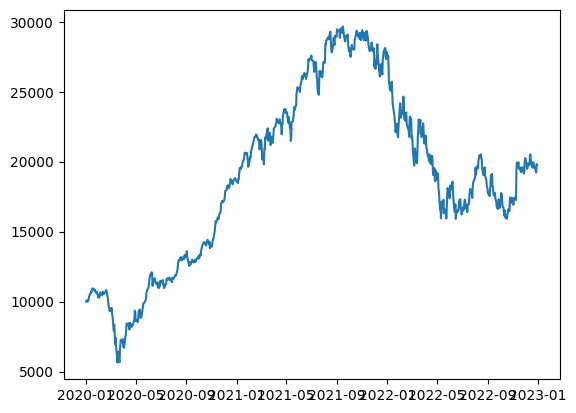

In [12]:
import matplotlib.pyplot as plt
chart = plt.subplot2grid((3, 2), (0, 0), rowspan=3, colspan=2)
chart.plot(result.portfolio.index, result.portfolio['market_value'])




In [20]:
result.portfolio.to_csv("jesse_results.csv")

In [13]:
result.trades.to_csv("jesse_trades.csv")

In [16]:
result.positions

,,long_shares,short_shares,close,equity,market_value,margin,unrealized_pnl
symbol,date,,,,,,,
LSTR,2020-01-03,12,0,113.35,1360.20,1360.20,0.0,8.40
RVLV,2020-01-03,77,0,18.89,1454.53,1454.53,0.0,33.11
EXPD,2020-01-03,18,0,77.87,1401.66,1401.66,0.0,9.54
ULTA,2020-01-03,5,0,250.17,1250.85,1250.85,0.0,-3.40
INMD,2020-01-03,74,0,18.42,1363.45,1363.45,0.0,17.39
...,...,...,...,...,...,...,...,...
MSFT,2022-12-30,11,0,239.82,2638.02,2638.02,0.0,11.44
LULU,2022-12-30,8,0,320.38,2563.04,2563.04,0.0,-9.77
STKS,2022-12-30,440,0,6.30,2772.00,2772.00,0.0,193.03


In [19]:
import pickle
with open('jesse.pkl', 'wb') as fp:
    pickle.dump(trade_exec, fp)